In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt


In [47]:
def getHistogram(image_folder_path:str):
    """
    Get the sum of distribution of RGB color as Histogram

    :param: image_folder_path: The path of the image folder
    """
    colors = ('b', 'g', 'r')
    class_name = image_folder_path.split("\\")[-1]
    images = os.listdir(image_folder_path)
    image_paths = [os.path.join(image_folder_path, image) for image in images]

    graph = {'b': [], 'g':[], 'r': []}

    for image_path in image_paths:  # Calculate the sum of image color distributions per class
        image = cv2.imread(image_path)
        for i, color in enumerate(colors):
            if len(graph[color]) == 0:
                graph[color] = cv2.calcHist([image], [i], None, [256], [0, 256])
            else:
                graph[color] += cv2.calcHist([image], [i], None, [256], [0, 256])
    
    plt.figure()
    for key, color_list in graph.items():  # Plot the image graph per color channel
        plt.plot(color_list, color=key)
        plt.xlim([0, 256])
        plt.title(f"Average color distribution of class {class_name}")
    plt.show()

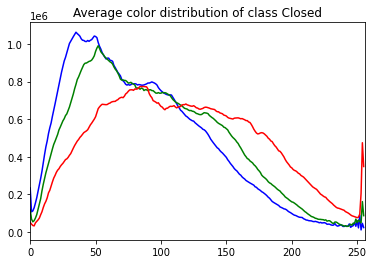

In [49]:
getHistogram(r"datasets\train\Closed")

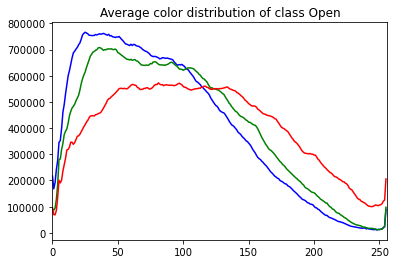

In [50]:
getHistogram(r"datasets\train\Open")

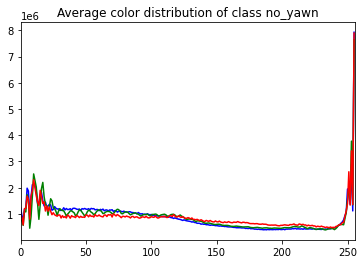

In [51]:
getHistogram(r"datasets\train\no_yawn")

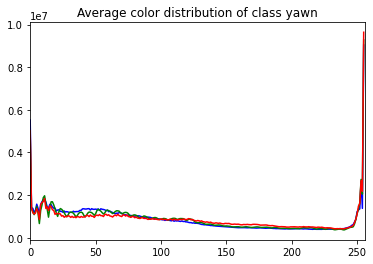

In [52]:
getHistogram(r"datasets\train\yawn")